In [36]:
from visanalysis.analysis import manalysis_ID as ImagingData
from visanalysis.analysis import STA_analysis as sta
from visanalysis.util import plot_tools
import matplotlib.pyplot as plt
import pickle

import numpy as np
import h5py

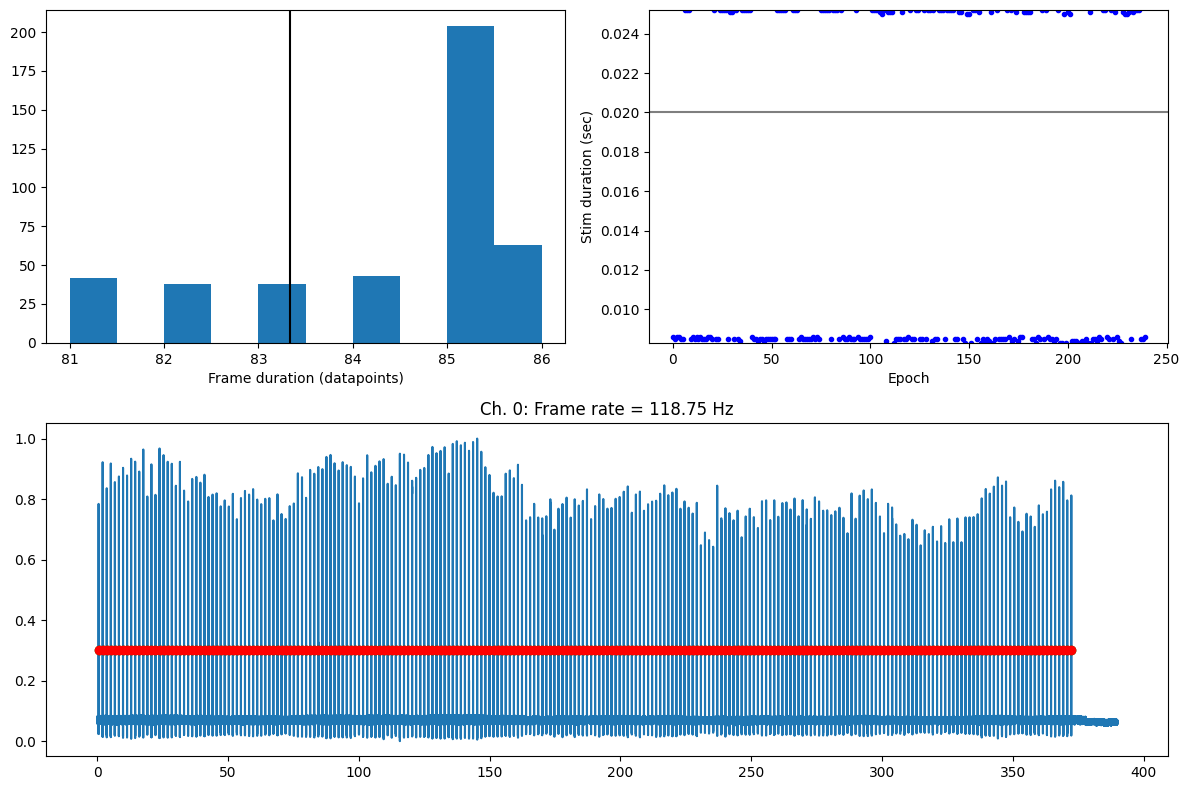

===================TIMING: Channel 0======================
240 Stims presented (of 240 parameterized)
Stim start to start: [min=1.533, median=1.550, max=1.592] / parameterized = 1.520 sec
Stim duration: [min=0.008, median=0.009, max=0.025] / parameterized = 0.020 sec
Dropped 0 / 668 frames (0.00%)


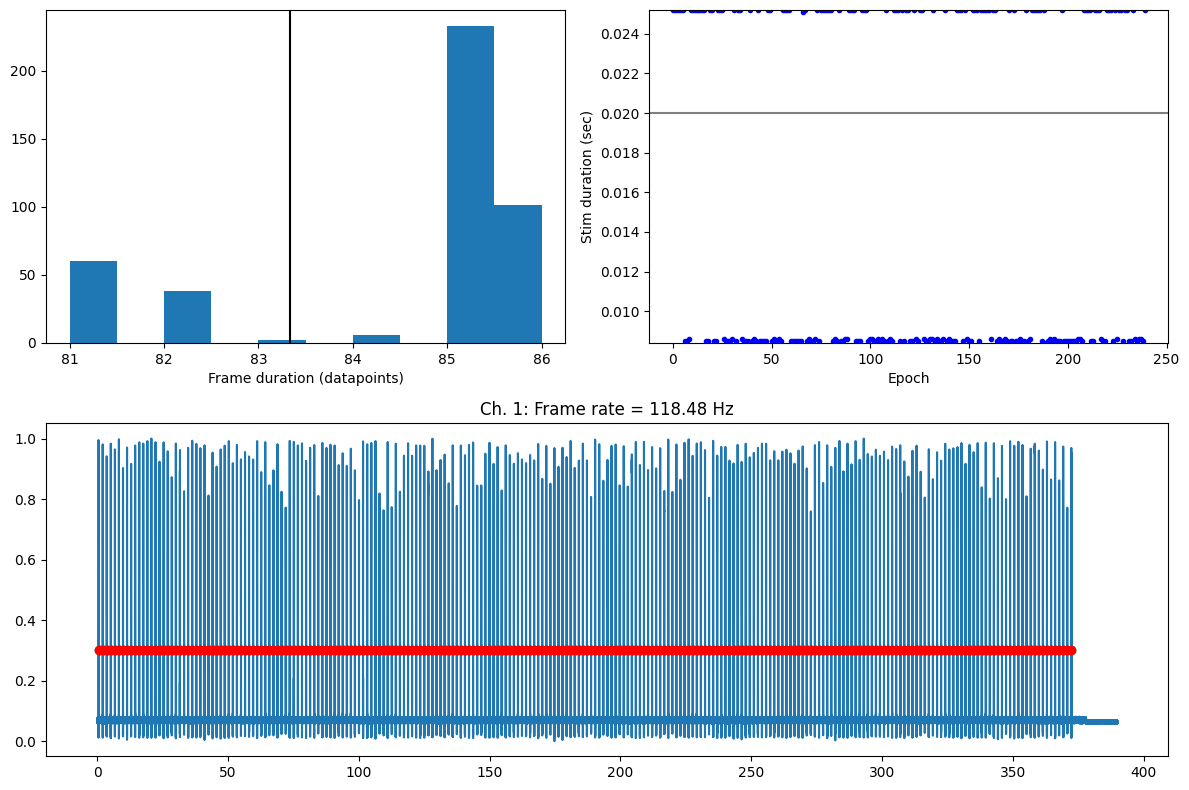

===================TIMING: Channel 1======================
240 Stims presented (of 240 parameterized)
Stim start to start: [min=1.534, median=1.550, max=1.592] / parameterized = 1.520 sec
Stim duration: [min=0.008, median=0.009, max=0.025] / parameterized = 0.020 sec
Dropped 0 / 680 frames (0.00%)


{'stimulus_end_times': array([  0.5658,   2.1242,   3.6744,   5.2412,   6.7913,   8.3414,
          9.9166,  11.4667,  13.0169,  14.5503,  16.1005,  17.6506,
         19.2008,  20.7509,  22.3094,  23.8595,  25.4096,  26.9931,
         28.5433,  30.1101,  31.6602,  33.2437,  34.7938,  36.3606,
         37.9441,  39.4942,  41.0527,  42.6029,  44.1363,  45.6947,
         47.2449,  48.7784,  50.3536,  51.887 ,  53.4371,  54.9956,
         56.5458,  58.0959,  59.6461,  61.1962,  62.7297,  64.2798,
         65.8299,  67.3967,  68.9552,  70.5054,  72.0804,  73.6306,
         75.1974,  76.7476,  78.3227,  79.8812,  81.4313,  83.0148,
         84.565 ,  86.1151,  87.6736,  89.2237,  90.7738,  92.324 ,
         93.8741,  95.4493,  96.9994,  98.5495, 100.108 , 101.6582,
        103.2416, 104.8084, 106.4002, 107.9504, 109.5255, 111.0757,
        112.6258, 114.1843, 115.7344, 117.3179, 118.868 , 120.4182,
        121.9683, 123.5184, 125.0519, 126.6354, 128.1855, 129.7357,
        131.2858, 132.8443

In [47]:
experiment_file_path = r'/Users/manzezhang/Documents/Stanford/Lab_Code/bruker_sr_data/2025-11-13.hdf5'
series_number = 6

ID = ImagingData.ImagingDataObject(experiment_file_path, series_number)
ID.getStimulusTiming(plot_trace_flag=True)

In [38]:
# plot search stim responses by rois

fig, ax = plt.subplots(1, int(roi_mat.get('resampled_average_epoch_response').shape[0]+1), figsize=(30, 2))
[x.set_axis_off() for x in ax]
    # [x.set_ylim([-0.25, 1]) for x in ax]

for r_ind in range(roi_mat.get('resampled_average_epoch_response').shape[0]):
    time_vector = roi_mat.get('time_vector')
    roi_resp = roi_mat.get('resampled_average_epoch_response')[r_ind]

    stim_time = (time_vector >= 0) & (time_vector <= 0.3)

    ax[r_ind].plot(time_vector, roi_resp, 'k')
    ax[r_ind].set_title(int(r_ind))
    ax[r_ind].fill_between([0, 0.3], 0, 1, transform=ax[r_ind].get_xaxis_transform(), color='gray', alpha=0.5)

    if r_ind == 0:  # scale bar
        plot_tools.addScaleBars(ax[r_ind], 1, 1, F_value=-0.1, T_value=-0.2)

NameError: name 'roi_mat' is not defined

In [48]:
# responding roi from search stimulus
resp_roi_ind = np.arange(3, 12) - 1

In [49]:
series_cond_resp_dic = {}
for cond in [0.0, 0.05, 0.1, 0.3, 0.35, 0.4]:
    epoch_ind = sta.getMatchingEpochIndices(ID, {'intensity': cond})
    print('the epoch indices for intensity {} are: '.format(cond), epoch_ind)
    roi_mat = sta.getEpochResponseResampled(ID,'M1',epoch_index=epoch_ind, resample_bin_frequency=120, full_trace_baseline=False)
    roi_mat['resp_roi_response'] = roi_mat.get('resampled_average_epoch_response')[resp_roi_ind, :]
    # current_mean = np.mean(roi_mat['resp_roi_response'], axis=0)
    # current_sem = np.std(roi_mat['resp_roi_response'], axis=0)/np.sqrt(len(roi_mat['resp_roi_response']))
    series_cond_resp_dic[cond] = roi_mat['resp_roi_response']
    if 'time_vector' not in series_cond_resp_dic:
        series_cond_resp_dic['time_vector'] = roi_mat['time_vector']




the epoch indices for intensity 0.0 are:  [0, 11, 15, 21, 24, 35, 38, 43, 52, 56, 60, 71, 76, 79, 87, 90, 98, 105, 110, 117, 120, 128, 137, 139, 144, 150, 156, 162, 169, 178, 181, 191, 192, 200, 206, 213, 217, 222, 231, 238]
===================TIMING: Channel 0======================
240 Stims presented (of 240 parameterized)
Stim start to start: [min=1.533, median=1.550, max=1.592] / parameterized = 1.520 sec
Stim duration: [min=0.008, median=0.009, max=0.025] / parameterized = 0.020 sec
Dropped 0 / 668 frames (0.00%)
===================TIMING: Channel 1======================
240 Stims presented (of 240 parameterized)
Stim start to start: [min=1.534, median=1.550, max=1.592] / parameterized = 1.520 sec
Stim duration: [min=0.008, median=0.009, max=0.025] / parameterized = 0.020 sec
Dropped 0 / 680 frames (0.00%)
===================TIMING: Channel 0======================
240 Stims presented (of 240 parameterized)
Stim start to start: [min=1.533, median=1.550, max=1.592] / parameterized =

In [50]:
with open("11-13-fly01-120hz.pkl", "wb") as f:
    pickle.dump(series_cond_resp_dic, f)

In [51]:
# load and aggragate all .pkl files that contains responding roi dff in different conditions
import pickle
import glob
import os

folder_path = '/Users/manzezhang/Documents/GitHub/manalysis/120hz'  # Current directory, or change to your specific path
merged_data = {}

# Find all .pkl files in the directory
pickle_files = glob.glob(os.path.join(folder_path, '*.pkl'))

if not pickle_files:
    print(f"No .pkl files found in {folder_path}")
else:
    print(f"Found {len(pickle_files)} pickle files.")

    temp_storage = {}

    for file_path in pickle_files:
        with open(file_path, 'rb') as f:
            try:
                data = pickle.load(f)
                
                # Check if loaded data is actually a dict
                if isinstance(data, dict):
                    for key, value in data.items():
                        if key not in temp_storage:
                            temp_storage[key] = []
                        # Append the array to the list for this key
                        temp_storage[key].append(value)
                else:
                    print(f"Skipping {file_path}: Content is not a dictionary.")
                    
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
    
    for key, array_list in temp_storage.items():
        if array_list:
            try:
                if key == 'time_vector':
                    merged_data[key] = array_list[0]
                else:
                    merged_data[key] = np.concatenate(array_list)
            except ValueError as e:
                print(f"Could not concatenate key '{key}': {e}. (Shape mismatch?)")

# Now merged_data['some_key'] is a list of [array_from_file1, array_from_file2, ...]

Found 3 pickle files.


In [6]:
with open(file_path, 'rb') as f:
    try:
        data = pickle.load(f)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

In [13]:
np.concatenate((data[0.0],data[0.1]),axis=0).shape

(24, 92)

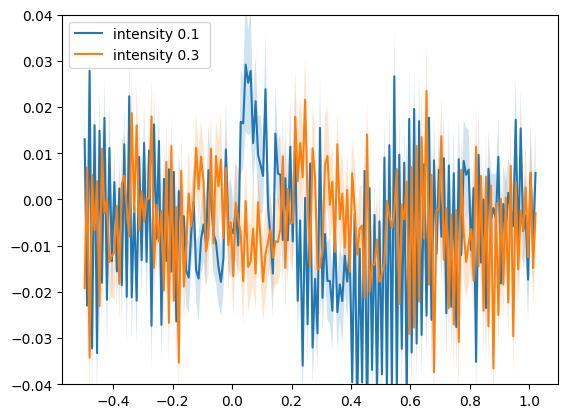

In [54]:
cond1 = 0.1
cond2 = 0.3

current_mean1 = merged_data.get(cond1).mean(axis=0)
current_sem1 = merged_data.get(cond1).std(axis=0)/np.sqrt(merged_data.get(cond1).shape[0])
current_mean2 = merged_data.get(cond2).mean(axis=0)
current_sem2 = merged_data.get(cond2).std(axis=0)/np.sqrt(merged_data.get(cond2).shape[0])

plt.plot(merged_data.get('time_vector'), current_mean1, label=f'intensity {cond1} ')
plt.fill_between(merged_data.get('time_vector'), current_mean1-current_sem1, current_mean1+current_sem1, alpha=0.2)
plt.plot(merged_data.get('time_vector'), current_mean2, label=f'intensity {cond2} ')
plt.fill_between(merged_data.get('time_vector'), current_mean2-current_sem2, current_mean2+current_sem2, alpha=0.2)
plt.ylim([-0.04, 0.04])

plt.legend()
plt.show()
